## WeatherPy

### Analysis

As suspected, the weather becomes warmer the closer you get to the equator (0 degrees latitude). There are some spikes in temperature between 20 degrees and 40 degrees latitude.

Neither humiditiy, cloudiness nor wind speed have direct relationships with the latitude. This applies to both the Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude).

There is a negative correlation between temperature and latitude. The further away from the equator (0 degrees latitude), the lower the temperature.

There is a positive correlation between latitude and max temperature. The closer you get to the equator (0 degrees latitude), the higher the temperature.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

601

## Perform API Calls

In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 4 of Set 1 | oktyabrskoye
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | talcahuano
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | tonantins
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | karamea
City not found. Skipping...
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | mangai
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | yar-sale
Processing Record 19 of Set 1 | alice springs
Processing Record 20 of Set 1 | busselton
Proces

Processing Record 37 of Set 4 | sao miguel do araguaia
Processing Record 38 of Set 4 | camapua
Processing Record 39 of Set 4 | saskylakh
Processing Record 40 of Set 4 | kortkeros
Processing Record 41 of Set 4 | nemuro
Processing Record 42 of Set 4 | acapulco
Processing Record 43 of Set 4 | ust-nera
Processing Record 44 of Set 4 | pecos
Processing Record 45 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 4 | vikulovo
Processing Record 47 of Set 4 | tuktoyaktuk
Processing Record 48 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 49 of Set 4 | new norfolk
Processing Record 0 of Set 5 | olafsvik
Processing Record 1 of Set 5 | touba
Processing Record 2 of Set 5 | pisco
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | linxi
Processing Record 5 of Set 5 | fort-shevchenko
Processing Record 6 of Set 5 | novikovo
Processing Record 7 of Set 5 | pozo colorado
Processing Record 8 of Set 5 | saint anthony
Processing Record 9 of Se

Processing Record 22 of Set 8 | mahon
Processing Record 23 of Set 8 | teknaf
Processing Record 24 of Set 8 | laibin
Processing Record 25 of Set 8 | poyarkovo
Processing Record 26 of Set 8 | oranjemund
Processing Record 27 of Set 8 | lata
Processing Record 28 of Set 8 | siddharthanagar
Processing Record 29 of Set 8 | boguchany
Processing Record 30 of Set 8 | vanavara
Processing Record 31 of Set 8 | okakarara
Processing Record 32 of Set 8 | tete
Processing Record 33 of Set 8 | casablanca
Processing Record 34 of Set 8 | lodja
Processing Record 35 of Set 8 | presque isle
Processing Record 36 of Set 8 | waddan
Processing Record 37 of Set 8 | lompoc
Processing Record 38 of Set 8 | haapu
City not found. Skipping...
Processing Record 39 of Set 8 | iskateley
Processing Record 40 of Set 8 | shahr-e babak
Processing Record 41 of Set 8 | maceio
Processing Record 42 of Set 8 | beyneu
Processing Record 43 of Set 8 | zeya
Processing Record 44 of Set 8 | juifang
City not found. Skipping...
Processing 

Processing Record 6 of Set 12 | elk city
Processing Record 7 of Set 12 | cassilandia
Processing Record 8 of Set 12 | san-pedro
Processing Record 9 of Set 12 | bom jesus
Processing Record 10 of Set 12 | chlumec
Processing Record 11 of Set 12 | sandwick
Processing Record 12 of Set 12 | shumikha
Processing Record 13 of Set 12 | swiecie
Processing Record 14 of Set 12 | chiredzi
Processing Record 15 of Set 12 | babstovo
Processing Record 16 of Set 12 | korla
Processing Record 17 of Set 12 | vardo
Processing Record 18 of Set 12 | hay river
Processing Record 19 of Set 12 | jos
Processing Record 20 of Set 12 | marsa matruh
Processing Record 21 of Set 12 | westpunt
City not found. Skipping...
Processing Record 22 of Set 12 | kununurra
Processing Record 23 of Set 12 | touros
Processing Record 24 of Set 12 | wanning
Processing Record 25 of Set 12 | lolua
City not found. Skipping...
Processing Record 26 of Set 12 | dayong
Processing Record 27 of Set 12 | aquiraz
Processing Record 28 of Set 12 | fo

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [8]:
# Display the City Data Frame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,72.75,80,6,24.94,PF,1595098260
1,oktyabrskoye,43.06,44.74,77.00,69,0,4.47,RU,1595098261
2,bluff,-46.60,168.33,36.52,81,0,7.09,NZ,1595098261
3,mataura,-46.19,168.86,30.78,93,0,2.44,NZ,1595098261
4,kapaa,22.08,-159.32,82.40,78,75,8.05,US,1595098261


In [9]:
# Check data stats
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,20.618907,20.215185,70.200870,68.942593,47.718519,7.894056,1.595098e+09
std,33.891308,89.888801,14.702804,21.526927,39.843321,5.128256,6.320599e+01
min,-54.800000,-175.200000,30.780000,3.000000,0.000000,0.340000,1.595098e+09
25%,-7.917500,-57.462500,58.510000,56.000000,1.000000,4.127500,1.595098e+09
50%,26.830000,24.055000,73.125000,74.500000,40.000000,6.930000,1.595098e+09
75%,48.805000,102.335000,80.600000,86.000000,90.000000,10.712500,1.595098e+09
max,78.220000,179.320000,108.070000,100.000000,100.000000,32.660000,1.595098e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_df[(city_data_df["Humidity"] > 100)].index

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,72.75,80,6,24.94,PF,1595098260
1,oktyabrskoye,43.06,44.74,77.00,69,0,4.47,RU,1595098261
2,bluff,-46.60,168.33,36.52,81,0,7.09,NZ,1595098261
3,mataura,-46.19,168.86,30.78,93,0,2.44,NZ,1595098261
4,kapaa,22.08,-159.32,82.40,78,75,8.05,US,1595098261


In [12]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs Temperature Plot

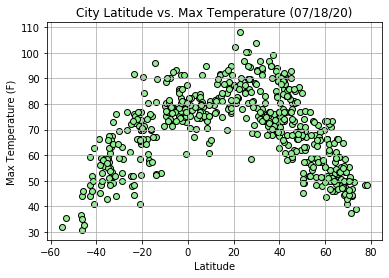

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### The weather becomes warmer the closer you get to the equator (0 degrees latitude). There are some spikes in temperature between 20 degrees and 40 degrees latitude.¶


## Latitude vs Humidity Plot

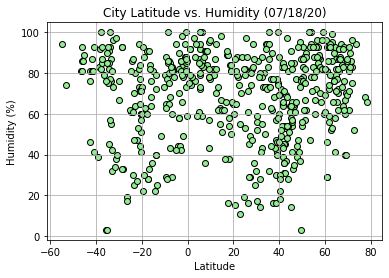

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude and humiditiy have no direct relationship.

## Latitude vs Cloudiness Plot

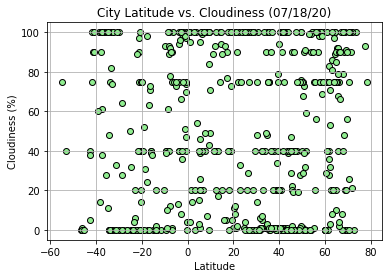

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude and cloudiness have no direct relationship.

## Latitude vs Wind Speed Plot

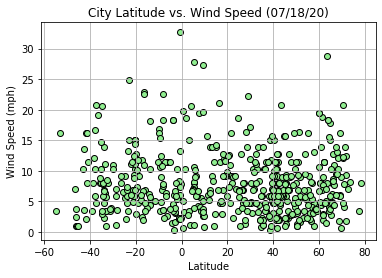

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

### Latitude and wind speed have no direct relationship.

## Linear Regression

In [17]:
# y = mx + b  (b = intercept, m = slope, x,y remain the same)
# r squared values range from 0 to 1 or 0% to 100%; the higher the r squared, the better the models fits the data

# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Max Temperature vs Latitude Linear Regression

The r-squared is: 0.4663842995693554


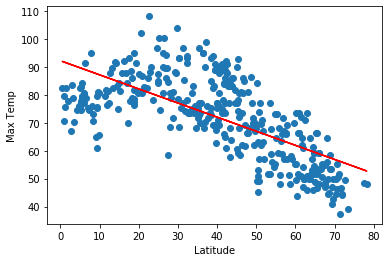

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

### In the Northern Hemisphere there is a negative correlation between temperature and latitude. The further away from the equator (0 degrees latitude), the lower the temperature.

The r-squared is: 0.6005548396746878


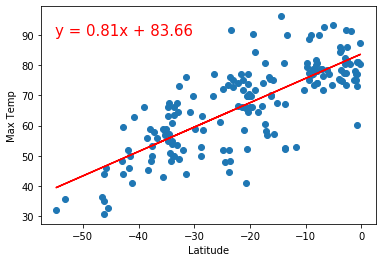

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

### In the Southern Hemisphere there is a positive correlation between latitude and max temperature. The closer you get to the equator (0 degrees latitude), the higher the temperature.

## Humidity vs Latitude Linear Regression

The r-squared is: 0.0022785074847281373


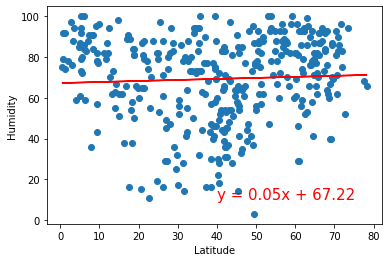

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

### In the Northern Hemisphere there is no correlation between humidity and latitude.

The r-squared is: 0.0016696053211028208


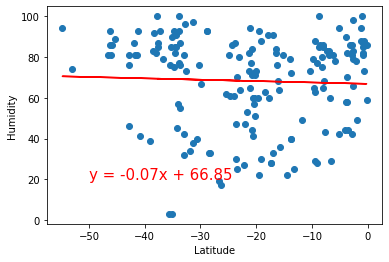

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

### In the Southern Hemisphere there is no correlation between humidity and latitude.

## Cloudiness (%) vs Latitude Linear Regression

The r-squared is: 0.003841708990540877


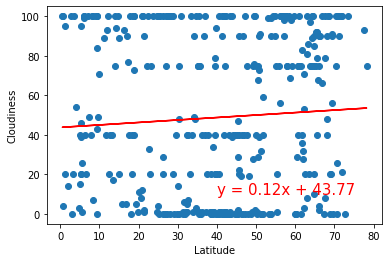

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

### In the Northern Hemisphere there is no correlation between cloudiness and latitude.

The r-squared is: 0.01098892753813793


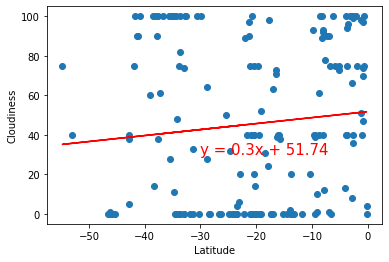

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

### In the Southern Hemisphere there is no correlation between cloudiness and latitude.

## Wind Speed (mph) vs Latitude Linear Regression

The r-squared is: 0.0023119425369760725


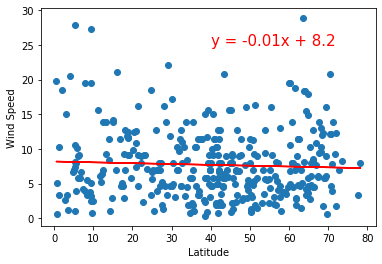

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

### In the Northern Hemisphere there is no correlation between windspeed and latitude.

The r-squared is: 0.0003952586954865099


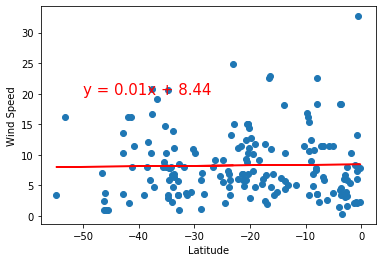

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

### In the Souththern Hemisphere there is no correlation between wind speed and latitude.